# Researching the data
First have a look at the data and see what we have to work with.

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import FunctionTransformer


train_ds = pd.read_csv('data/train.csv')

# Data description
Define all columns and the type of feature they are, numerical or categorical or ordinal.
* Danceability: Numerical feature - a measure from 0 to 10 describing how suitable a track is for dancing.
* Track: string feature - name of the song, as visible on the Spotify platform.
* Artist: string feature - name of the artist.
* Composer: string feature - name of the composer.
* Album: string feature - the album in which the song is contained on Spotify.
* Channel: string feature - name of the channel that has published the video.
* Title: string feature - title of the video clip on YouTube.
* Album_type: Categorical feature - indicates if the song is released on Spotify as a single or contained in an album.
* Key: Categorical feature - the key the track is in, mapped to pitches using standard Pitch Class notation.
* Licensed: Categorical feature - indicates whether the video represents licensed content.
* official_video: Categorical feature - boolean value that indicates if the video found is the official video of the song.
* Energy: Numerical feature - a measure from 0.0 to 1.0 representing the perceptual measure of intensity and activity.
* Loudness: Numerical feature - the overall loudness of a track in decibels (dB).
* Speechiness: Numerical feature - detects the presence of spoken words in a track.
* Acousticness: Numerical feature - a confidence measure from 0.0 to 1.0 of whether the track is acoustic.
* Instrumentalness: Numerical feature - predicts whether a track contains no vocals.
* Liveness: Numerical feature - detects the presence of an audience in the recording.
* Valence: Numerical feature - a measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track.
* Tempo: Numerical feature - the overall estimated tempo of a track in beats per minute (BPM).
* Duration_ms: Numerical feature - the duration of the track in milliseconds.
* Stream: Numerical feature - number of streams of the song on Spotify.
* Views: Numerical feature - number of views.
* Likes: Numerical feature - number of likes.
* Comments: Numerical feature - number of comments.
* Description: string feature - description of the video on YouTube.

In [75]:
label_feature = 'Danceability'
numerical_features = ['Energy', 'Loudness', 'Speechiness', 'Acousticness',
                      'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Stream',
                      'Views', 'Likes', 'Comments']

categorical_features = ['Album_type', 'Key', 'Licensed', 'official_video']

string_features = [
    'Track', 'Artist', 'Composer', 'Album', 'Title', 'Channel', 'Description'
]

columns = [label_feature] + numerical_features + categorical_features + string_features

# Nan values percentage
for each columns we find the percentage of Nan values

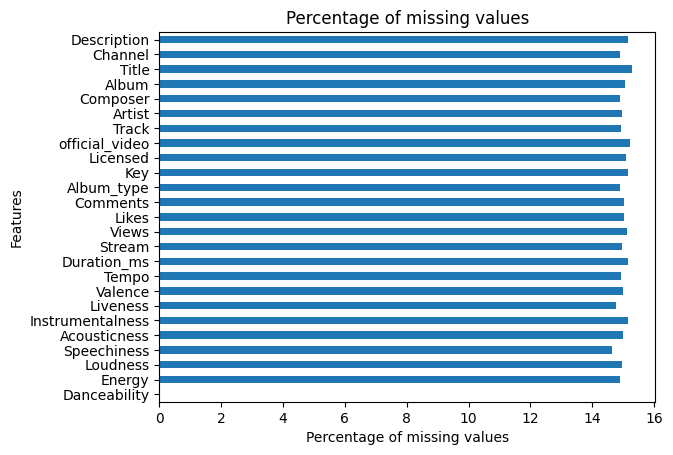

In [76]:
(train_ds[columns].isna().sum() / len(train_ds) * 100).plot.barh()
# plt.gcf().set_size_inches(5, 6)  # Set figure size
plt.title("Percentage of missing values")
plt.xlabel("Percentage of missing values")
plt.ylabel("Features")
plt.show()


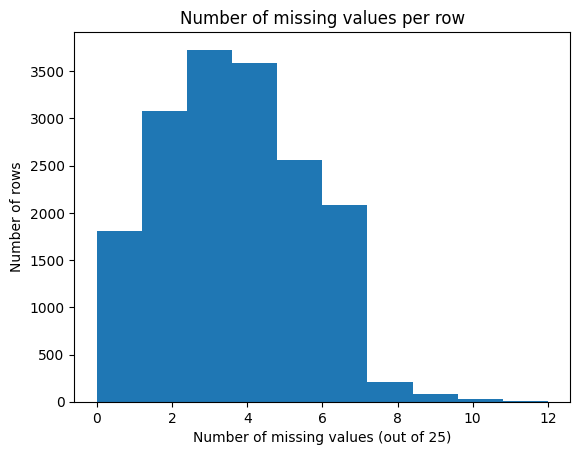

In [77]:
# for each row, how many features are missing value
train_ds[columns].isna().sum(axis=1).plot.hist()
plt.title("Number of missing values per row")
plt.xlabel("Number of missing values (out of 25)")
plt.ylabel("Number of rows")
plt.show()

solution of missing values
1. add binary variable for each feature to indicate rather the value is missing
2. train a model to predict missing values

# Distribution of each features

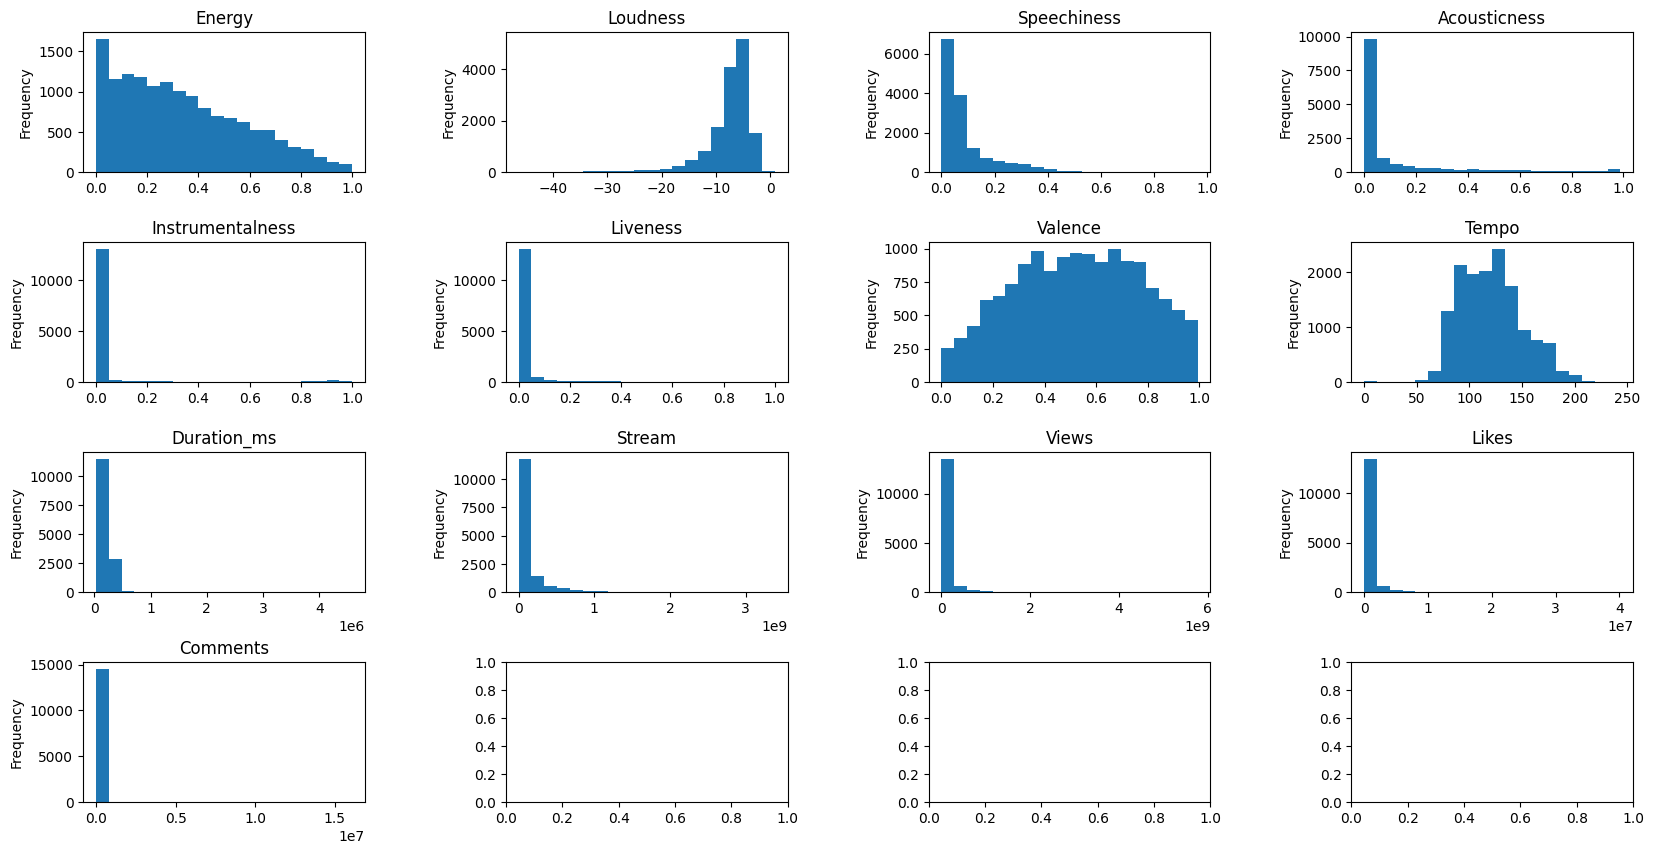

In [78]:
# plot distribution of numerical features
def plot_distribution(df, features):
    fig, axes = plt.subplots(4, 4, figsize=(20, 10))
    axes = axes.flatten()
    # Adjust spacing between subplots
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    for i, feature in enumerate(features):
        df[feature].plot.hist(ax=axes[i], bins=20)
        axes[i].set_title(feature)
    plt.show()
    
plot_distribution(train_ds, numerical_features)

In [79]:
skewed_features = ['Energy', 'Loudness', 'Duration_ms', 'Stream', 'Views', 'Likes', 'Comments']
special_skewed_features = ['Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness']

normal_features = ['Valence', 'Tempo']

# Investigate realtionship of numerical features

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_feature_relationship(df, features, label_feature, figsize=(12, 8)):
    data = df[features + [label_feature]]

    num_features = len(features)
    num_cols = 2  # Number of columns in the subplot grid
    num_rows = (num_features + num_cols - 1) // num_cols  # Number of rows in the subplot grid

    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.ravel()  # Flatten the axes array

    for i, feature in enumerate(features):
        ax = axes[i]  # Get the current subplot

        # Plot the relationship between the feature and label using box plot
        x = data[feature]
        y = data[label_feature]
        sns.boxplot(x=x, y=y, orient='h', ax=ax)

        # Set plot title and labels
        ax.set_title(f"{feature} vs {label_feature}")
        ax.set_ylabel(label_feature)
        ax.set_xlabel(feature)

    # Hide empty subplots, if any
    if num_features < len(axes):
        for j in range(num_features, len(axes)):
            axes[j].axis('off')

    # Adjust spacing between subplots
    fig.tight_layout()

    # Show the plot
    plt.show()

def plot_scatter(df, features, figsize=(10, 10)):
    num_features = len(features)
    num_cols = 2  # Number of columns in the subplot grid
    num_rows = (num_features + num_cols - 1) // num_cols  # Number of rows in the subplot grid

    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    # Adjust spacing between subplots
    plt.subplots_adjust(hspace=0.5, wspace=0.5)

    for i, feature in enumerate(features):
        ax = axes[i]  # Get the current subplot
        df.plot.scatter(x=feature, y=label_feature, ax=ax, alpha=0.5, s=1)
        # Set y-axis ticks
        ax.set_yticks(np.arange(0, 10, 1))
        ax.set_title(feature)

    # Hide empty subplots, if any
    if num_features < len(axes):
        for j in range(num_features, len(axes)):
            axes[j].axis('off')

    # Show the plot
    plt.show()


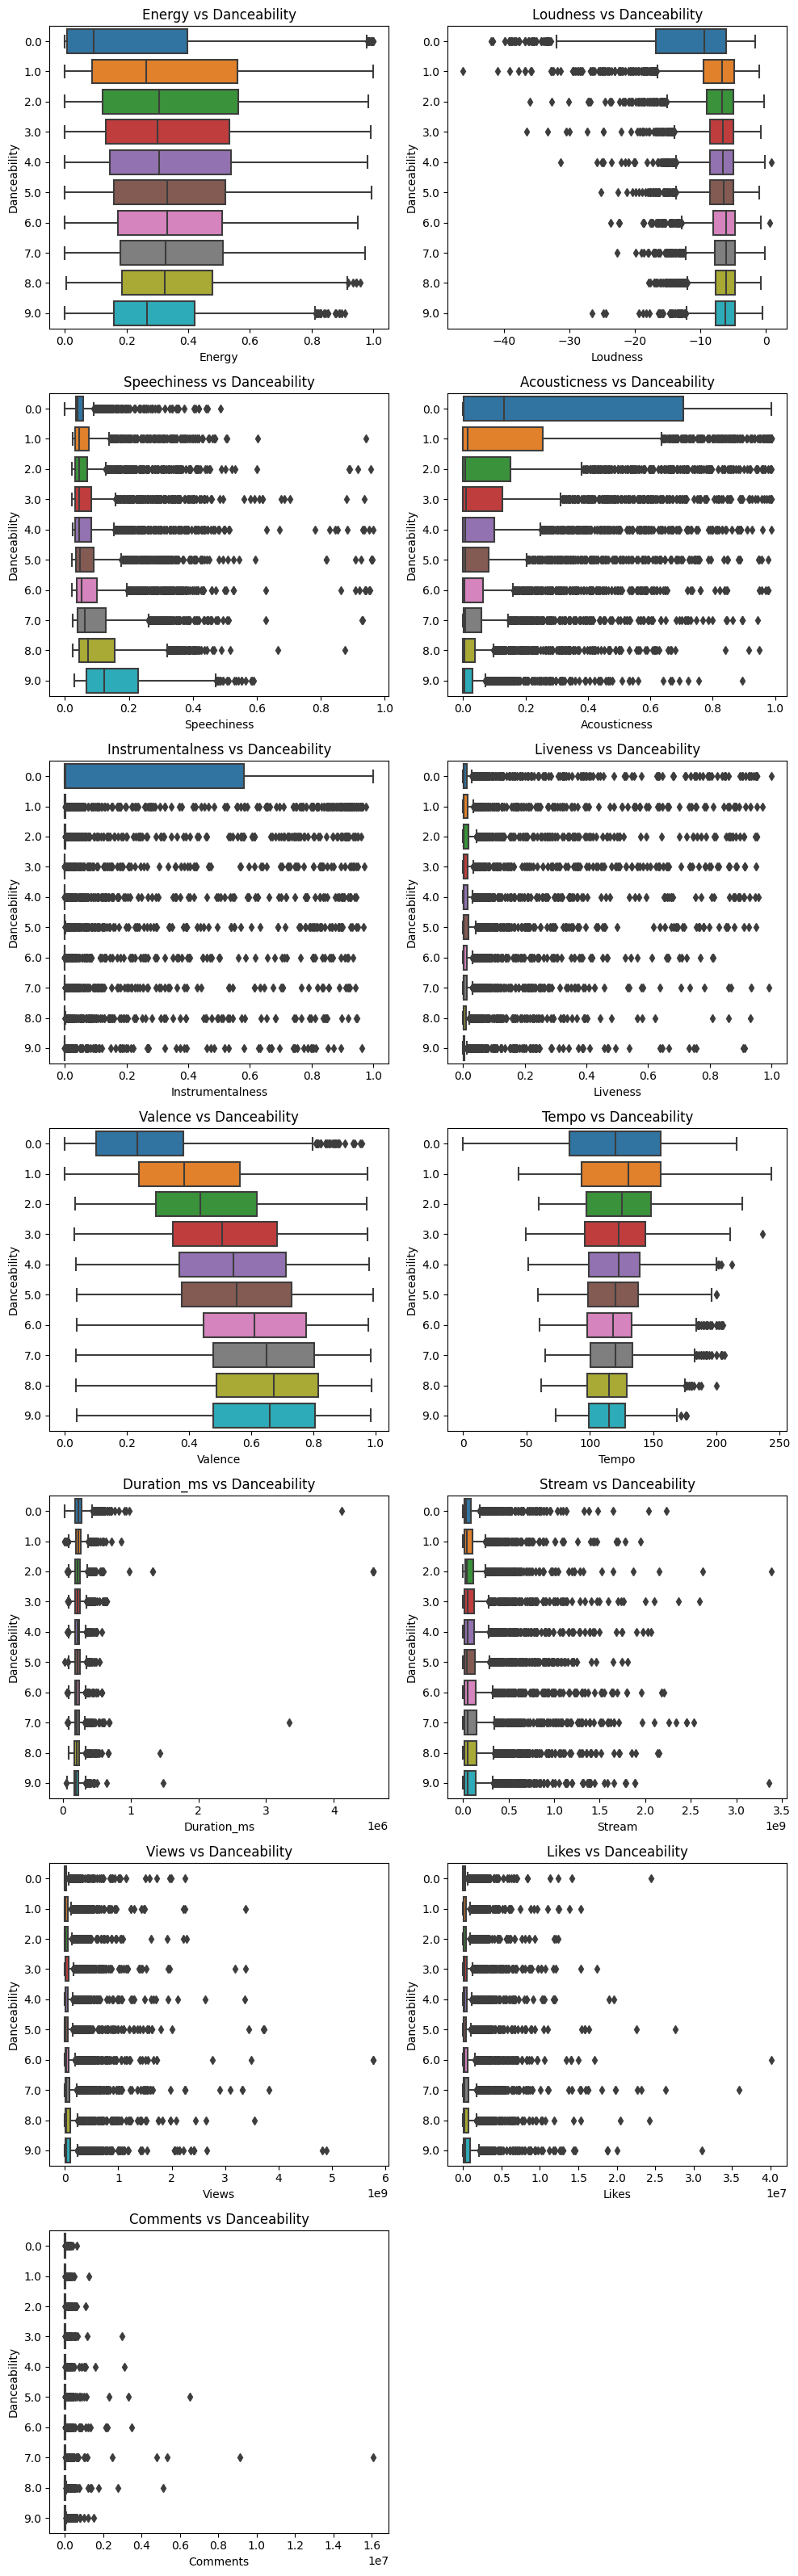

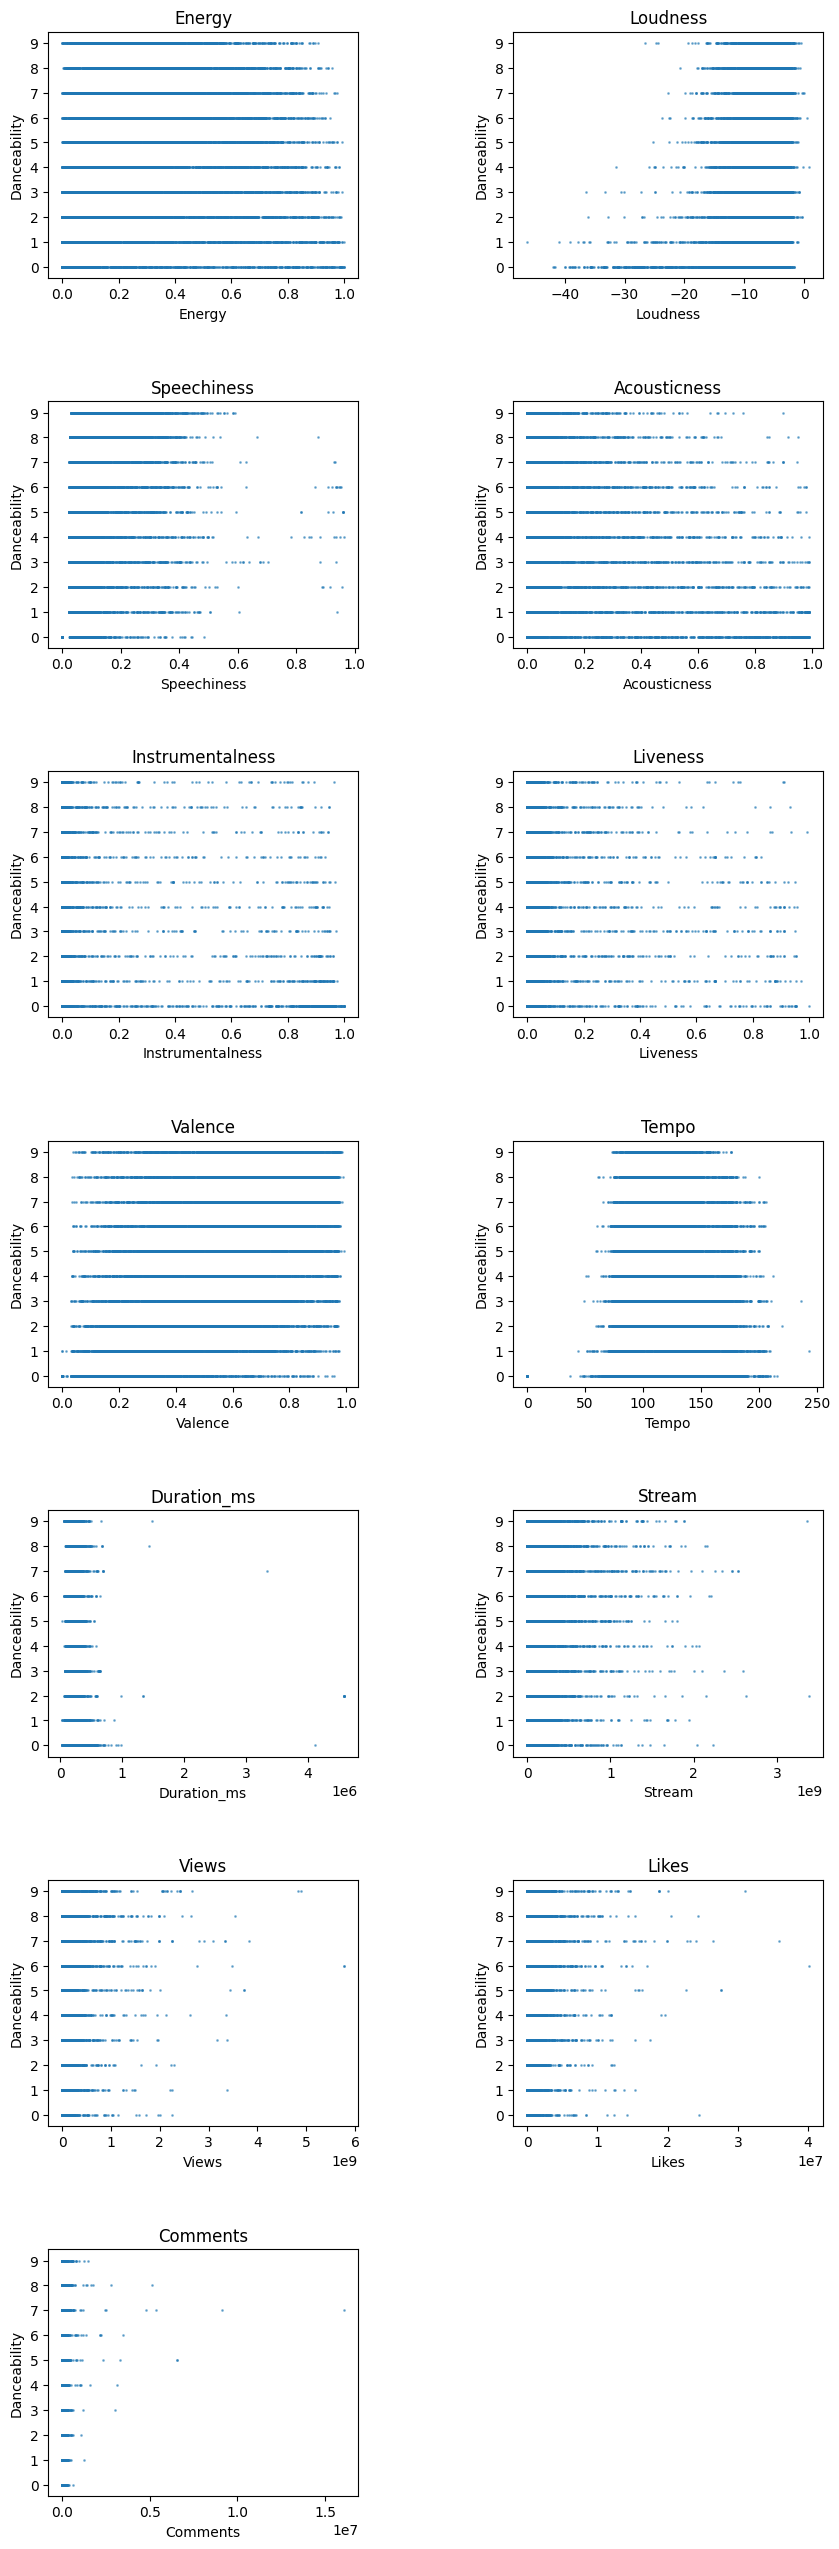

In [81]:
# Call the function with the appropriate inputs
plot_feature_relationship(train_ds, numerical_features, label_feature, figsize=(10, 32))
plot_scatter(train_ds, numerical_features, figsize=(10, 32))

# Investigate Categorical Features

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_categorical_relationship(train_ds, features, label_feature, figsize=(12, 8)):
    data = train_ds[features + [label_feature]]

    num_features = len(features)
    num_cols = 2  # Number of columns in the subplot grid
    num_rows = (num_features + num_cols - 1) // num_cols  # Number of rows in the subplot grid

    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.ravel()  # Flatten the axes array

    for i, feature in enumerate(features):
        ax = axes[i]  # Get the current subplot

        # Plot the relationship between the feature and label using count plot
        sns.countplot(data=data, x=feature, hue=label_feature, ax=ax)

        # Set plot title and labels
        ax.set_title(f"{feature} vs {label_feature}")
        ax.set_ylabel("Count")
        ax.set_xlabel(feature)
        ax.legend(title=label_feature)

    # Hide empty subplots, if any
    if num_features < len(axes):
        for j in range(num_features, len(axes)):
            axes[j].axis('off')

    # Adjust spacing between subplots
    fig.tight_layout()

    # Show the plot
    plt.show()


# Normalize numerical feastures

In [82]:
# Initialize the StandardScaler object
normal_transformer = StandardScaler()
skewed_transformer = PowerTransformer()
special_transformer = PowerTransformer()

# Fit the scaler on your training dataset
normal_transformer.fit(train_ds[normal_features])
skewed_transformer.fit(train_ds[skewed_features])
special_transformer.fit(train_ds[special_skewed_features])

# Normalize the numerical features in the training dataset
trainsformed_train_ds = train_ds.copy()
trainsformed_train_ds[normal_features] = normal_transformer.transform(train_ds[normal_features])
trainsformed_train_ds[skewed_features] = skewed_transformer.transform(train_ds[skewed_features])
trainsformed_train_ds[special_skewed_features] = special_transformer.transform(train_ds[special_skewed_features])

In [83]:
sk2 = PowerTransformer()
sk2.fit(trainsformed_train_ds[special_skewed_features])
trainsformed_train_ds[special_skewed_features] = sk2.transform(trainsformed_train_ds[special_skewed_features])

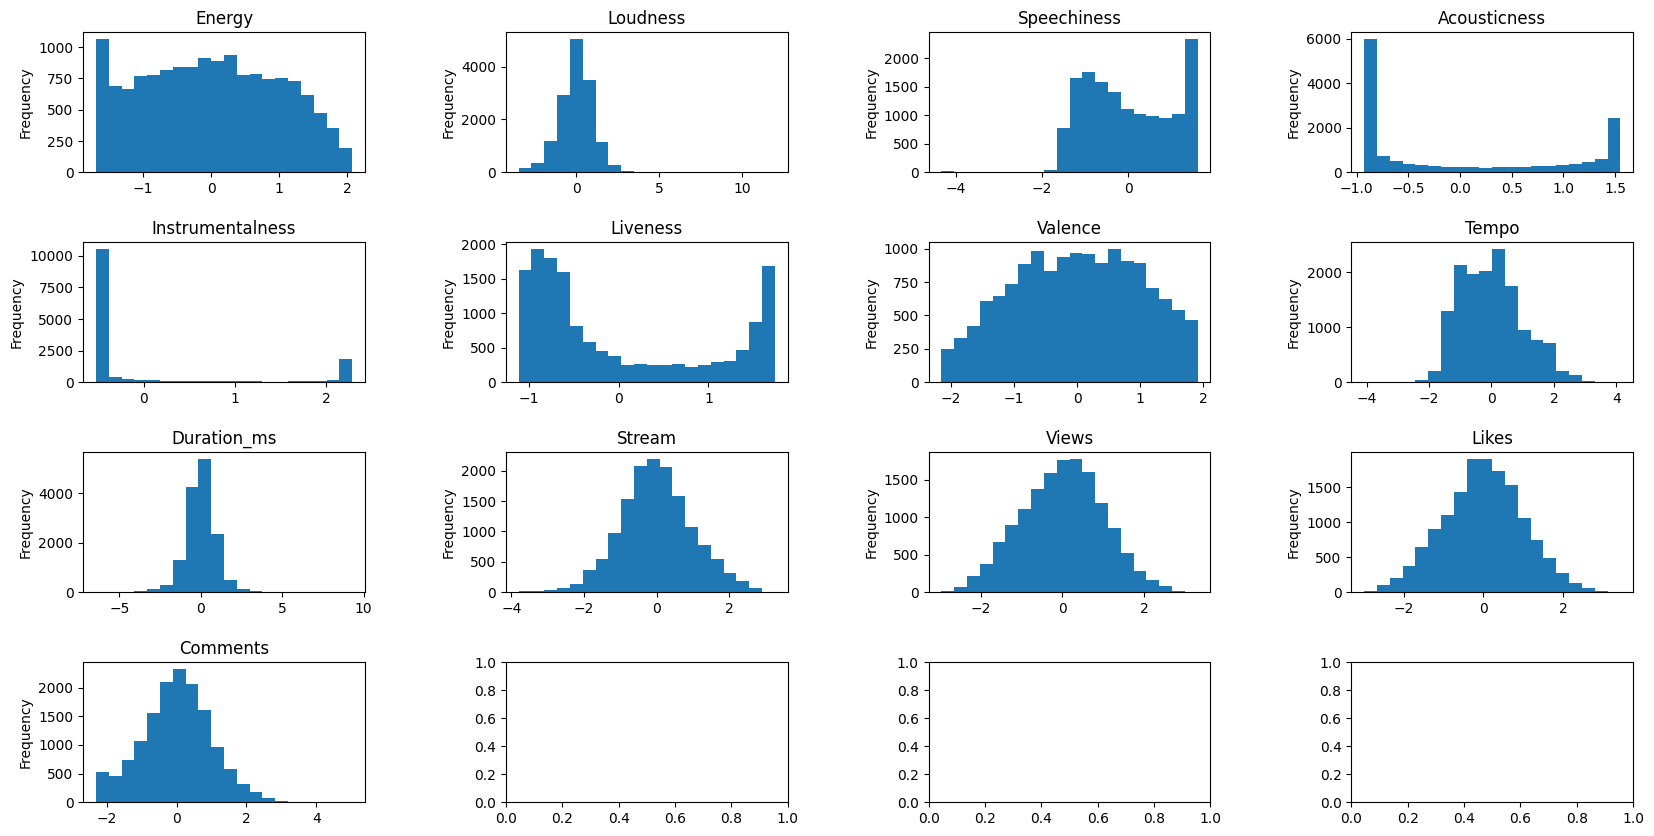

In [84]:
plot_distribution(trainsformed_train_ds, numerical_features)

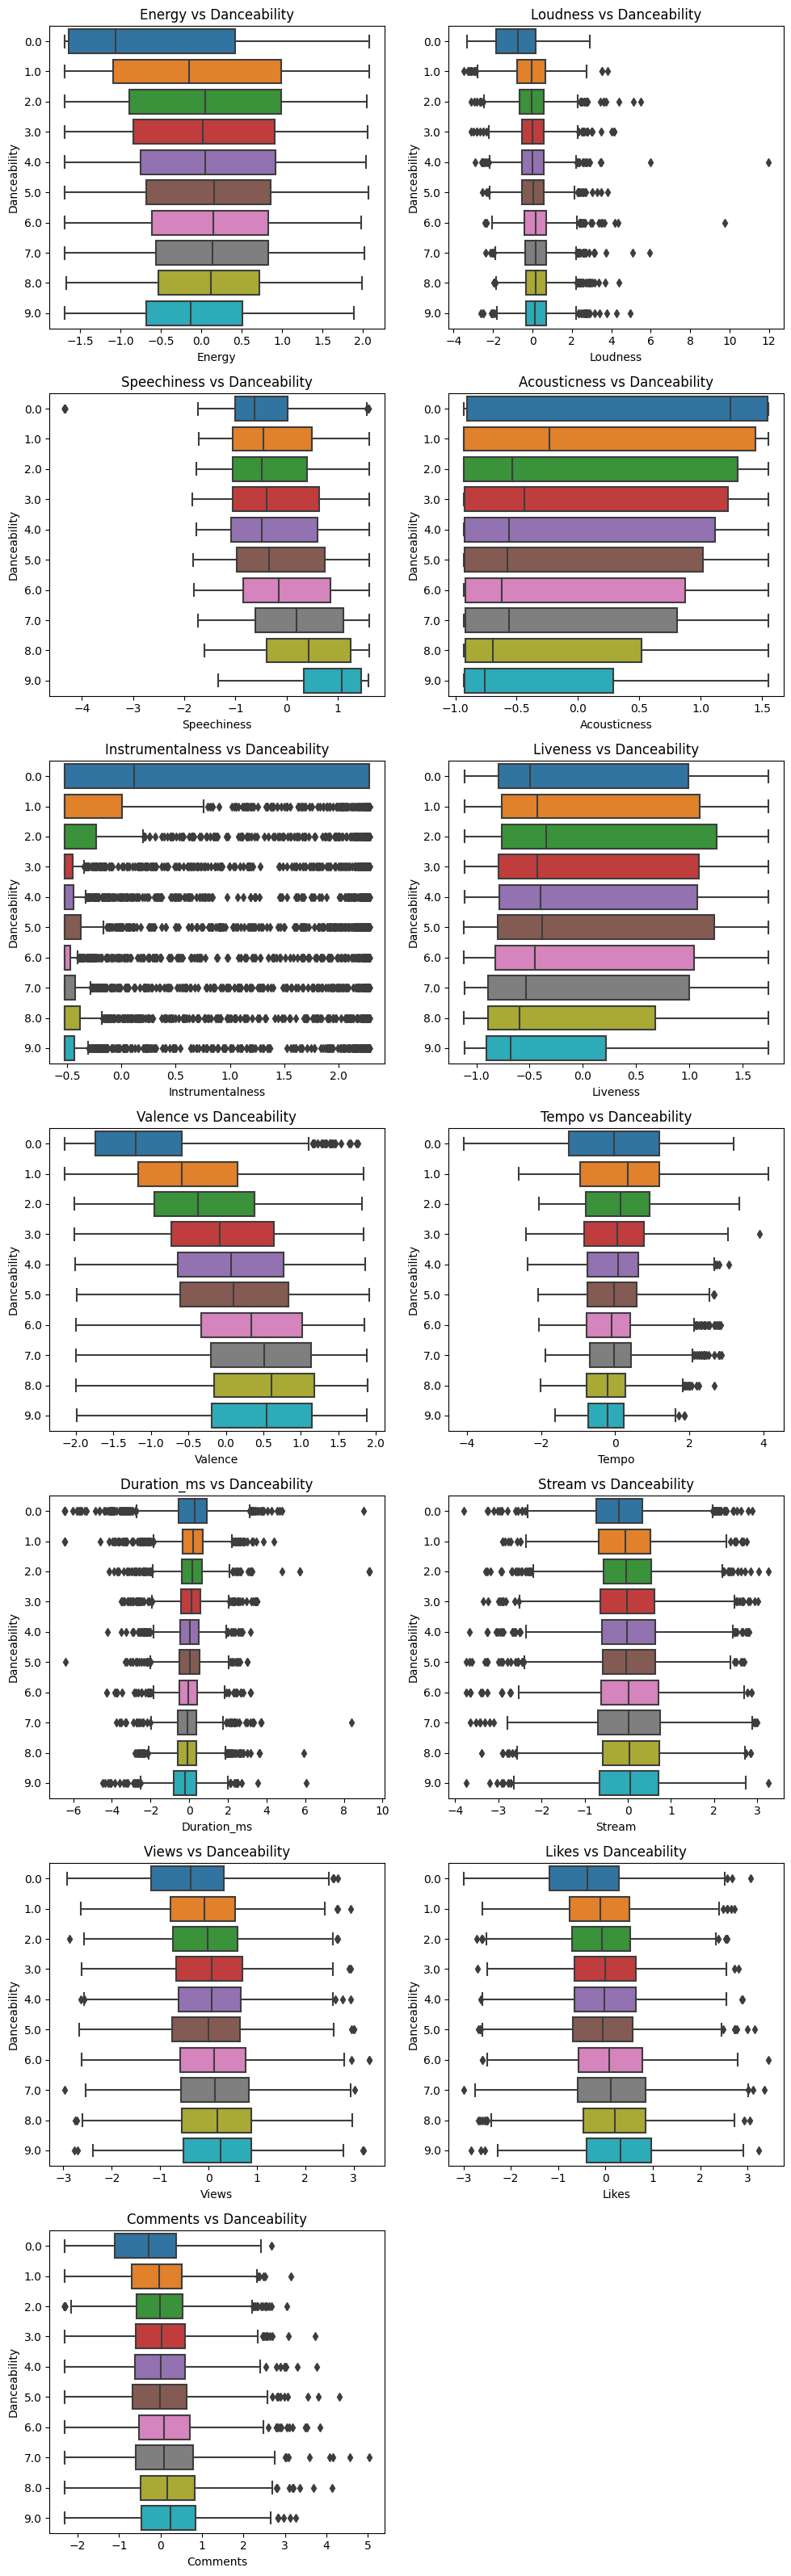

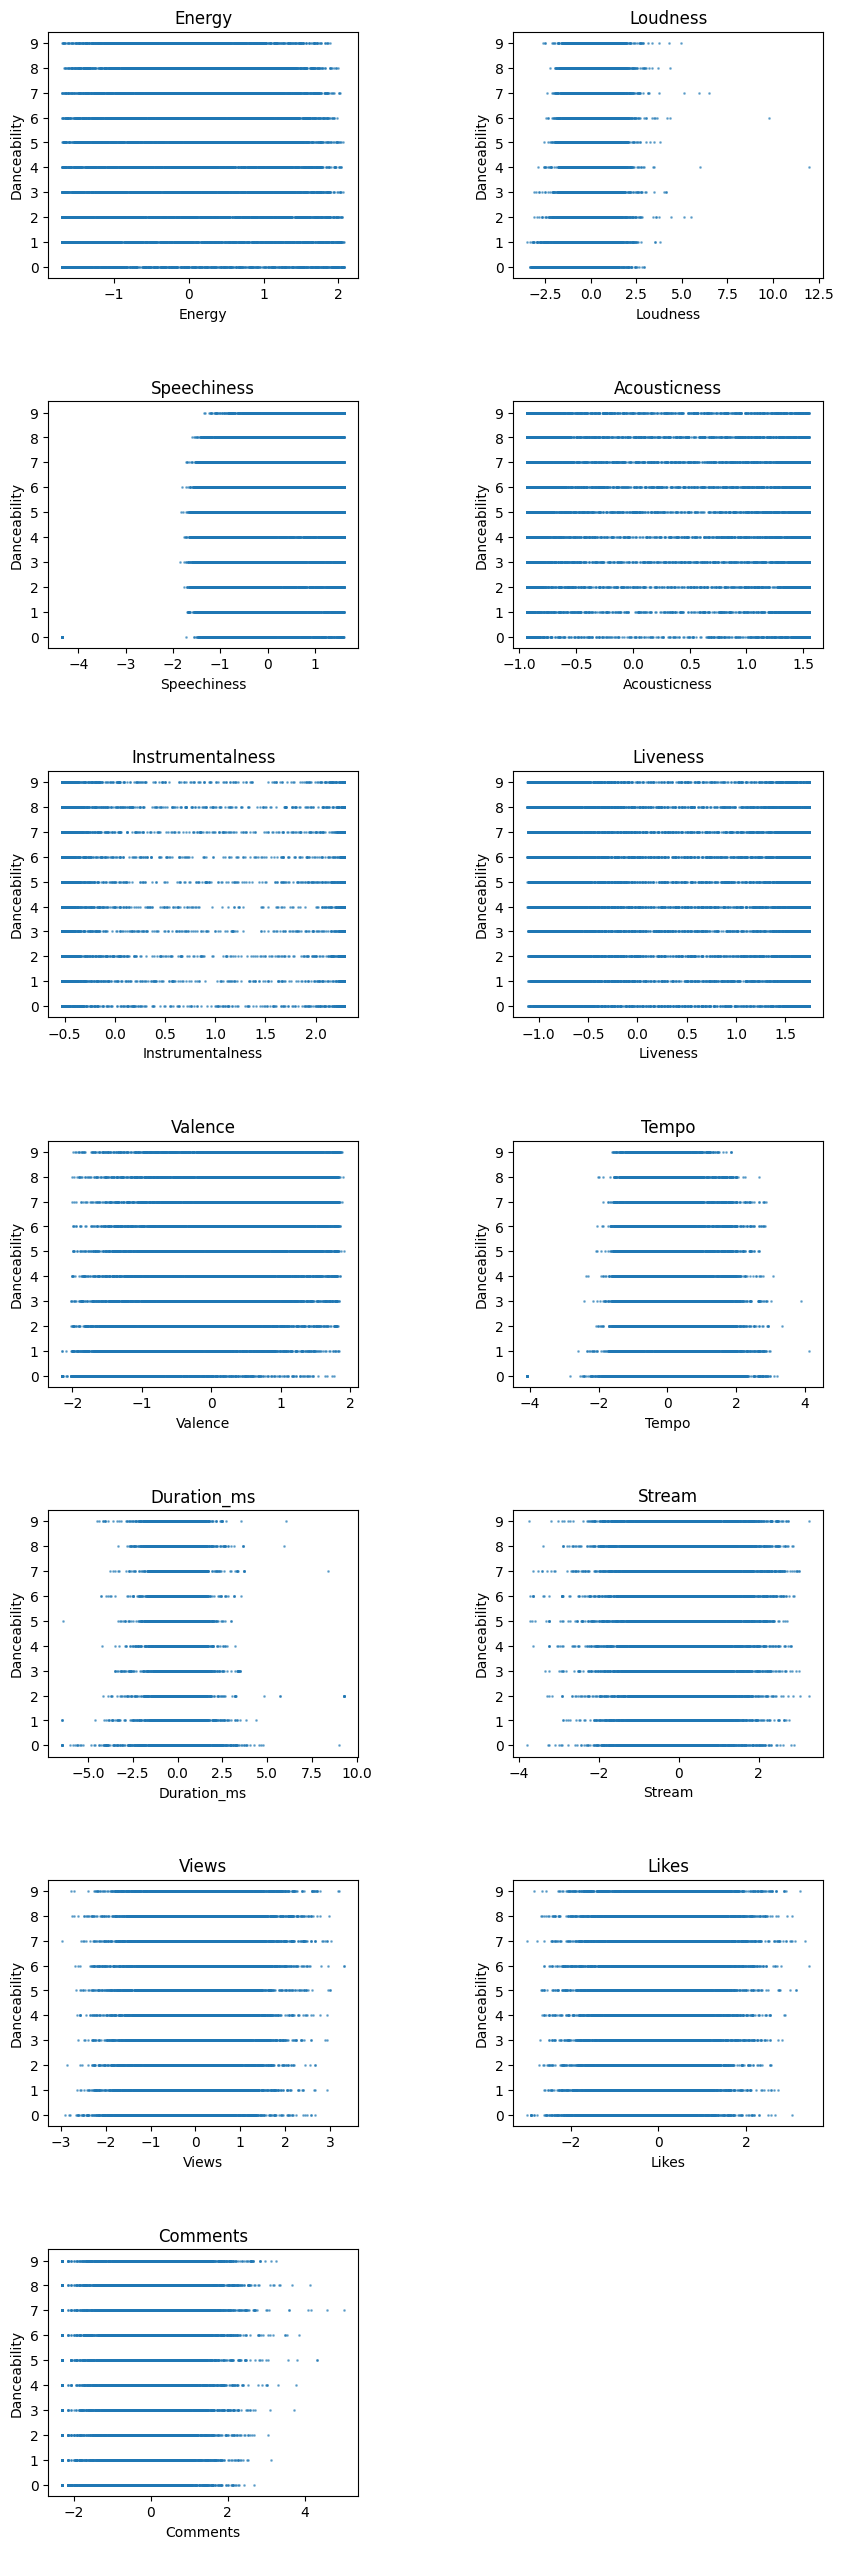

In [85]:
plot_feature_relationship(trainsformed_train_ds, numerical_features, label_feature, figsize=(10, 32))
plot_scatter(trainsformed_train_ds, numerical_features, figsize=(10, 32))

# One-hot encode categorical features

In [10]:
# One-hot encode categorical features
trainsformed_train_ds = trainsformed_train_ds[numerical_features + categorical_features + [label_feature]]
trainsformed_dummy_train_ds = pd.get_dummies(trainsformed_train_ds, columns=categorical_features)

# Transform Label

In [11]:
label_transformer = StandardScaler()
label_transformer.fit(trainsformed_dummy_train_ds[[label_feature]])
trainsformed_dummy_train_ds[[label_feature]] = label_transformer.transform(trainsformed_dummy_train_ds[[label_feature]])

# Train regression

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import HistGradientBoostingRegressor

X, Y = trainsformed_dummy_train_ds.drop(columns=[label_feature]), trainsformed_dummy_train_ds[label_feature]

# Split the data into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'l2_regularization': [0.1, 1.0],
    'learning_rate': [0.1],
    'max_iter': [100]
}

def custom_scorer(y_true, y_pred):
    y_pred = label_transformer.inverse_transform([y_pred])
    y_pred = np.clip(np.round(y_pred), 0, 9)
    y_true = label_transformer.inverse_transform([y_true])
    print(mean_absolute_error(y_true, y_pred))
    return -mean_absolute_error(y_true, y_pred)

# Create an instance of the HistGradientBoostingRegressor
hist_gb_regressor = HistGradientBoostingRegressor()

# Perform grid search with cross-validation
scoring = make_scorer(custom_scorer)
grid_search = GridSearchCV(hist_gb_regressor, param_grid, scoring=scoring, cv=5)
grid_search.fit(X_train, Y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_

# Print the best parameters and score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Create a new instance of HistGradientBoostingRegressor with the best parameters
best_hist_gb_regressor = HistGradientBoostingRegressor(**best_params)

# Fit the best HistGradientBoostingRegressor on the entire dataset
trained_model = best_hist_gb_regressor.fit(X, Y)


1.6488355167394468
1.653440116490717
1.6869311976701857
1.663269020749909
1.6545322169639607
1.6517467248908297
1.6559883509282853
1.6967601019293774
1.6661812886785585
1.6483436476155806
Best Parameters: {'l2_regularization': 0.1, 'learning_rate': 0.1, 'max_iter': 100}
Best Score: 1.661401613722844


# Predict Test Data

In [13]:
test_ds = pd.read_csv('data/test.csv')

# Transform the test data
transformed_test_ds = test_ds.copy()
transformed_test_ds[normal_features] = normal_transformer.transform(test_ds[normal_features])
transformed_test_ds[skewed_features] = skewed_transformer.transform(test_ds[skewed_features])
transformed_test_ds[special_skewed_features] = special_transformer.transform(test_ds[special_skewed_features])

transformed_test_ds = transformed_test_ds[numerical_features + categorical_features]
transformed_dummy_test_ds = pd.get_dummies(transformed_test_ds, columns=categorical_features)

# Make predictions on the test set
test_predictions = trained_model.predict(transformed_dummy_test_ds)
test_predictions = label_transformer.inverse_transform([test_predictions])
test_predictions = np.round(test_predictions)
test_predictions = np.clip(test_predictions, 0, 9)
test_predictions = test_predictions.astype(int).reshape(-1)

# Prepare the submission dataframe
submission_df = pd.DataFrame({'id': test_ds['id'], 'Danceability': test_predictions})

# Save the submission to a CSV file
submission_df.to_csv('submission.csv', index=False)